In [13]:
import numpy as np
import matplotlib.pyplot as plt
from gofish import imagecube
import dsharp_helper as dh
import helper_functions

import astropy.constants as c
import astropy.units as u

In [14]:
import importlib
importlib.reload(helper_functions)

<module 'helper_functions' from '/Users/franceschi/mysims/IMLup/Til/helper_functions.py'>

Set the parameters used to process the image

In [15]:
disk = 'IMLup'
PA = dh.sources.loc[disk]['PA']
inc = dh.sources.loc[disk]['inc']
dpc = dh.sources.loc[disk]['distance [pc]']
clip = 10
z0 = 0.2
psi = 1.27
lam_sca = 1.65e-4
pixelsize = (12.5*u.mas).to('deg').value # pixel size
beam_sca = (0.040, 0.040, 0.0) # the "beam" assumed in the radial profile calculation

Read the image and set beam parameters

In [16]:
# fname = 'tmp_lghj4yj/image_sca.fits'
fname = 'IM_Lup_reducedRob_median_Hband_12.25mas_mod.fits'
cube = imagecube(fname)
cube.bmaj, cube.bmin, cube.bpa = beam_sca

Since we re-use these keywords all the time, we pack them in a dictionary

In [17]:
disk_surface = dict(inc=inc, PA=PA, z0=z0, psi=psi)

Define the a mask for testing

In [18]:
# mask_params = dict(
#     r_min=4,
#     r_max=5,
#     PA_min=-95,
#     PA_max=-85,
#     )

In [19]:
annulus_mask_params = dict(
    r_min=0.95,
    r_max=1.05,
    PA_min=-180,
    PA_max=180,
    )

Here we select a region outside the disk where we extract the noise

In [20]:
noise_mask_params = dict(
    r_min=4.,
    r_max=6.,
    PA_min=-100,
    PA_max=-80,
    )

	 Reverting to standard azimuthal averaging; will ignore `unit` argument.


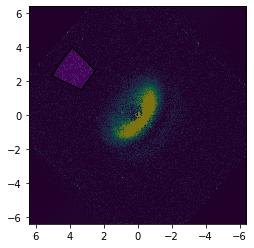

In [21]:
f, ax = plt.subplots()

xv, yv, dyv = cube.radial_profile(rbins=np.array([annulus_mask_params['r_min'], annulus_mask_params['r_max']]), **annulus_mask_params, **disk_surface)
ax.imshow(cube.data / yv, extent=cube.extent, vmin=0.01, vmax=1, origin='lower')
cube.plot_mask(**disk_surface, **noise_mask_params, ax=ax, mask_frame='disk')


Here we extract the radial profile in the region outside of the disk

In [22]:
x, y, dy = cube.radial_profile(rbins=np.array([noise_mask_params['r_min'], noise_mask_params['r_max']]), **disk_surface, **noise_mask_params, exclude_PA=False)

	 Reverting to standard azimuthal averaging; will ignore `unit` argument.


In [23]:
print(x, y, dy)

[5.] [-0.01386704] [0.05125014]


As a check: plot the mask and the profile and the radial average

	 Reverting to standard azimuthal averaging; will ignore `unit` argument.


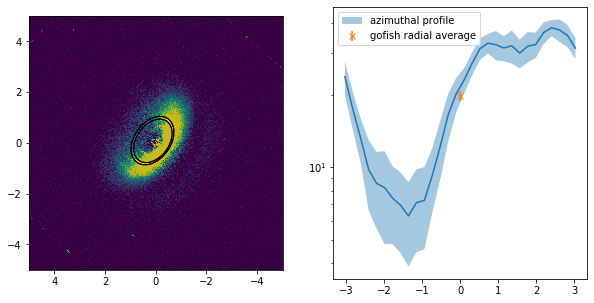

In [24]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))

xv, yv, dyv = cube.radial_profile(rbins=np.array([annulus_mask_params['r_min'], annulus_mask_params['r_max']]), **annulus_mask_params, **disk_surface)

x, y, dy = helper_functions.azimuthal_profile(cube, **annulus_mask_params, **disk_surface)

ax[1].semilogy(x, y)
ax[1].errorbar(x.mean(), yv, dyv, fmt='x', label='gofish radial average')
ax[1].fill_between(x, y - dy, y + dy, alpha=0.4, label='azimuthal profile')

ax[0].imshow(cube.data /yv, extent=cube.extent, vmin=0.1, vmax=1, origin='lower')

cube.plot_mask(ax=ax[0], **annulus_mask_params, **disk_surface, mask_alpha=0.2)

ax[0].set_xlim([5, -5])
ax[0].set_ylim([-5, 5])
ax[1].legend();